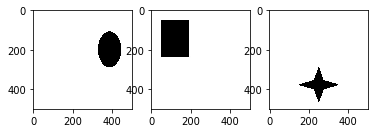

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

daire = plt.imread('daire.jpeg')
dikdortgen = plt.imread('dikdortgen.jpeg')
yildiz = plt.imread('yildiz.jpeg')

m,n,k = daire.shape #görselin 3 boyutlu olduğunu görüyoruz. iki boyuta (gray level) indirgememiz lazım 

daire2 = np.zeros((m,n),dtype = np.uint8)
daire2 = daire[:,:,0]

dikdortgen2 = np.zeros((m,n),dtype = np.uint8)
dikdortgen2 = dikdortgen[:,:,0]

yildiz2 = np.zeros((m,n),dtype = np.uint8)
yildiz2 = yildiz[:,:,0]

plt.subplot(1,3,1)
plt.imshow(daire2, cmap='gray')

plt.subplot(1,3,2)
plt.imshow(dikdortgen2, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(yildiz2, cmap='gray')

In [13]:
#yıldız için mbr hesaplaması
coordinates = []
img = yildiz2
for i in range(m):
    for j in range(n):
        if(img[i,j] < 150):
            coordinates.append((i,j))
            break
    if(len(coordinates) == 1):
        break

for i in range(m):
    for j in range(n):
        if(img[m-i-1,j] < 150):
            coordinates.append((m-i-1,j))
            break
    if(len(coordinates) == 2):
        break
        
for j in range(n):
    for i in range(m):
        if(img[i,j] < 150):
            coordinates.append((i,j))
            break
    if(len(coordinates) == 3):
        break
        
for j in range(n):
    for i in range(m):
        if(img[i,n-j-1] < 150):
            coordinates.append((i,n-j-1))
            break
    if(len(coordinates) == 4):
        break

In [14]:
coordinates

[(288, 250), (466, 250), (376, 151), (376, 350)]

In [16]:
m2 = coordinates[1][0] - coordinates[0][0]
n2 = coordinates[3][1] - coordinates[2][1]
img2 = np.zeros((m2,n2),dtype = np.uint8)

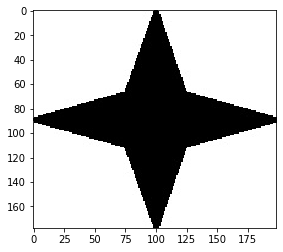

In [20]:
m3,n3 = coordinates[0][0], coordinates[2][1]
for i in range(m2):
    for j in range(n2):
        img2[i,j] = img[m3+i,n3+j]
plt.imshow(img2,cmap = 'gray')

In [22]:
#intensity
def histogram_gray(img):
    m,n = img.shape
    histogram = {}
    for i in range(m):
        for j in range(n):
            if(img[i,j] in histogram.keys()):
                histogram[img[i,j]] += 1
            else:
                histogram[img[i,j]] = 1
    return histogram

In [23]:
hist = histogram_gray(img2)

In [24]:
hist

{255: 24665,
 254: 438,
 253: 280,
 0: 8583,
 1: 412,
 2: 302,
 252: 201,
 5: 44,
 251: 84,
 250: 50,
 6: 21,
 3: 198,
 4: 89,
 249: 27,
 7: 7,
 248: 12,
 246: 4,
 9: 3,
 8: 1,
 247: 1}

In [29]:
def mean_filter(img):
    m,n = img.shape
    new_img = np.zeros((m+1,n+1), dtype = np.uint8)
    img2 = np.zeros ((m+1,n+1), dtype = np.uint8)
    img2[1:m+1,1:n+1] = img
    img = img2
    for i in range(1,m):
        for j in range(1,n):
            new_img[i,j] = (img[i-1,j-1]/9)+(img[i,j-1]/9)+(img[i+1,j-1]/9)+(img[i-1,j]/9)+(img[i,j]/9)+(img[i+1,j]/9)+(img[i-1,j+1]/9)+(img[i,j+1]/9)+(img[i+1,j+1]/9)
    return new_img

In [31]:
img_new = mean_filter(img2)

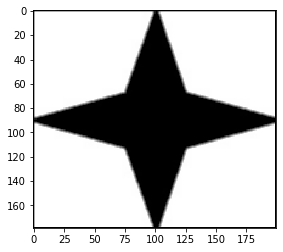

In [33]:
plt.imshow(img_new, cmap ='gray')

In [35]:
hist2 = histogram_gray(img_new)

In [36]:
len(hist), len(hist2)

(20, 31)

In [37]:
hist

{255: 24665,
 254: 438,
 253: 280,
 0: 8583,
 1: 412,
 2: 302,
 252: 201,
 5: 44,
 251: 84,
 250: 50,
 6: 21,
 3: 198,
 4: 89,
 249: 27,
 7: 7,
 248: 12,
 246: 4,
 9: 3,
 8: 1,
 247: 1}

In [38]:
hist2

{0: 8991,
 113: 153,
 170: 378,
 169: 176,
 141: 154,
 85: 165,
 29: 84,
 1: 669,
 28: 100,
 84: 33,
 255: 21905,
 254: 1846,
 253: 552,
 197: 106,
 57: 122,
 226: 99,
 142: 18,
 198: 65,
 114: 12,
 56: 54,
 225: 72,
 112: 11,
 86: 7,
 252: 3,
 224: 2,
 140: 8,
 2: 6,
 168: 3,
 196: 3,
 30: 1,
 58: 2}